<a href="https://colab.research.google.com/github/juliakaneko/Analysis/blob/main/Decision_trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
#!pip install pydot
#!pip install pydot-ng
#!pip install graphviz
!pip install --upgrade scikit-learn==0.20.3

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/kyphosis.csv')

In [32]:
df.head()

Kyphosis  Age  Number  Start
0   absent   71       3      5
1   absent  158       3     14
2  present  128       4      5
3   absent    2       5      1
4   absent    1       4     15

#EDA

In [33]:
df.info

<bound method DataFrame.info of    Kyphosis  Age  Number  Start
0    absent   71       3      5
1    absent  158       3     14
2   present  128       4      5
3    absent    2       5      1
4    absent    1       4     15
..      ...  ...     ...    ...
76  present  157       3     13
77   absent   26       7     13
78   absent  120       2     13
79  present   42       7      6
80   absent   36       4     13

[81 rows x 4 columns]>

In [34]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

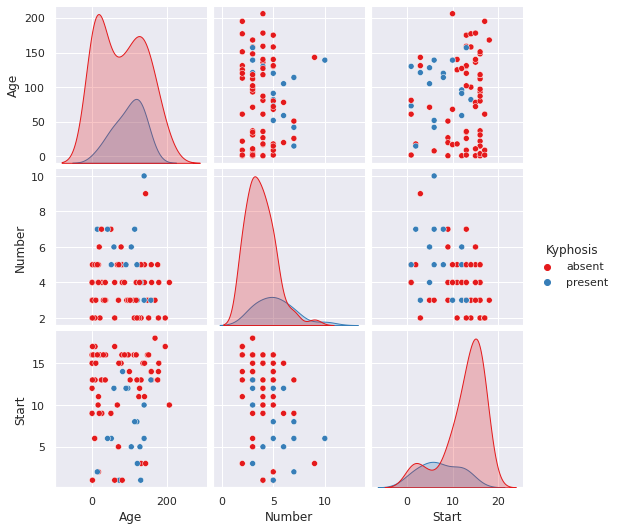

In [35]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

#Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

#Decision Trees

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Prediction and Evaluation

In [40]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.75      0.86        24
     present       0.14      1.00      0.25         1

   micro avg       0.76      0.76      0.76        25
   macro avg       0.57      0.88      0.55        25
weighted avg       0.97      0.76      0.83        25



In [41]:
print(confusion_matrix(y_test,predictions))

[[18  6]
 [ 0  1]]


#Tree Visualizations

In [42]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

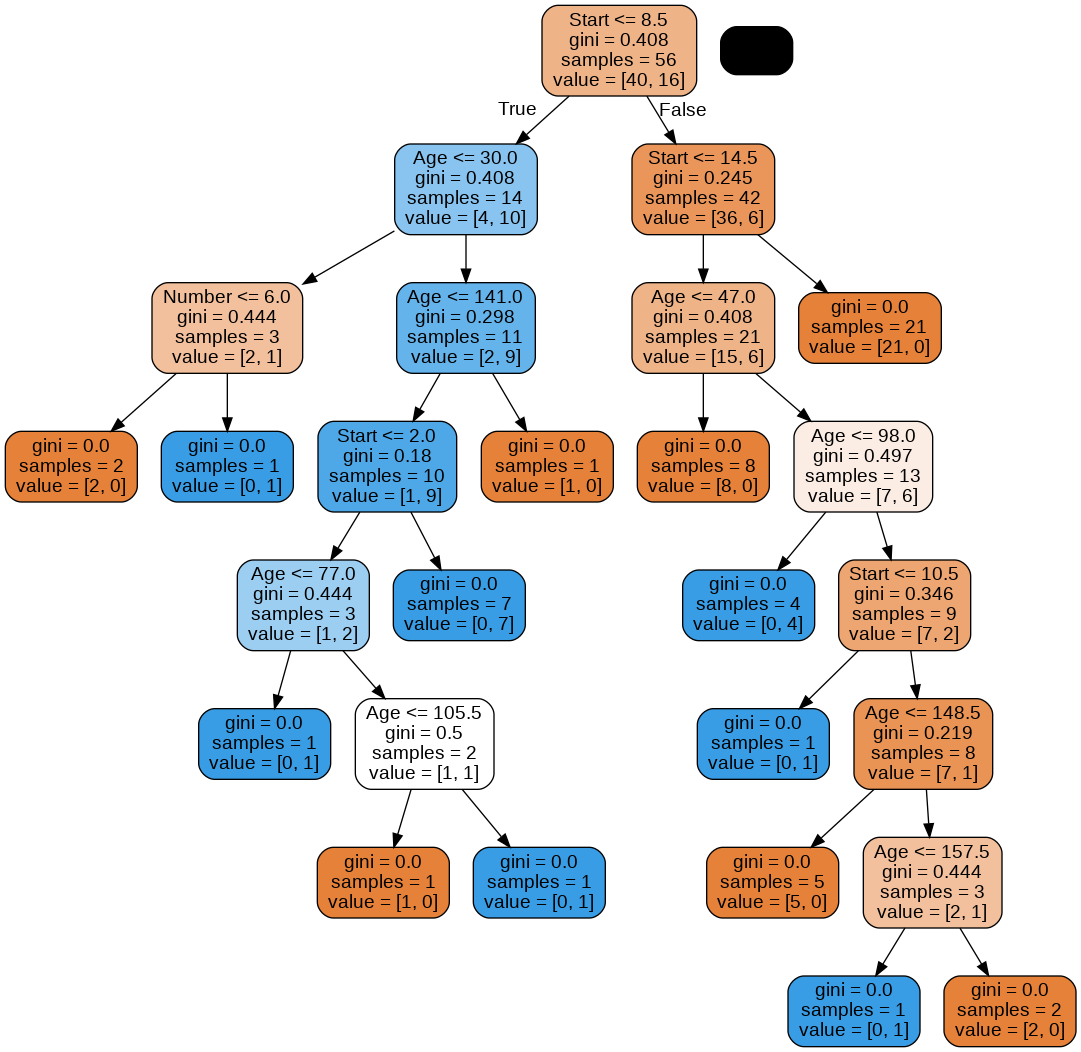

In [43]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

#Random Forests

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
rfc_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test,rfc_pred))

[[20  4]
 [ 0  1]]


In [47]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       1.00      0.83      0.91        24
     present       0.20      1.00      0.33         1

   micro avg       0.84      0.84      0.84        25
   macro avg       0.60      0.92      0.62        25
weighted avg       0.97      0.84      0.89        25



#EXTRA

In [89]:
data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/loan_data.csv')

In [90]:
data

credit.policy             purpose  ...  pub.rec  not.fully.paid
0                 1  debt_consolidation  ...        0               0
1                 1         credit_card  ...        0               0
2                 1  debt_consolidation  ...        0               0
3                 1  debt_consolidation  ...        0               0
4                 1         credit_card  ...        0               0
...             ...                 ...  ...      ...             ...
9573              0           all_other  ...        0               1
9574              0           all_other  ...        0               1
9575              0  debt_consolidation  ...        0               1
9576              0    home_improvement  ...        0               1
9577              0  debt_consolidation  ...        0               1

[9578 rows x 14 columns]

In [91]:
data.info

<bound method DataFrame.info of       credit.policy             purpose  ...  pub.rec  not.fully.paid
0                 1  debt_consolidation  ...        0               0
1                 1         credit_card  ...        0               0
2                 1  debt_consolidation  ...        0               0
3                 1  debt_consolidation  ...        0               0
4                 1         credit_card  ...        0               0
...             ...                 ...  ...      ...             ...
9573              0           all_other  ...        0               1
9574              0           all_other  ...        0               1
9575              0  debt_consolidation  ...        0               1
9576              0    home_improvement  ...        0               1
9577              0  debt_consolidation  ...        0               1

[9578 rows x 14 columns]>

In [92]:
df.describe()

Age     Number      Start
count   81.000000  81.000000  81.000000
mean    83.654321   4.049383  11.493827
std     58.104251   1.619423   4.883962
min      1.000000   2.000000   1.000000
25%     26.000000   3.000000   9.000000
50%     87.000000   4.000000  13.000000
75%    130.000000   5.000000  16.000000
max    206.000000  10.000000  18.000000

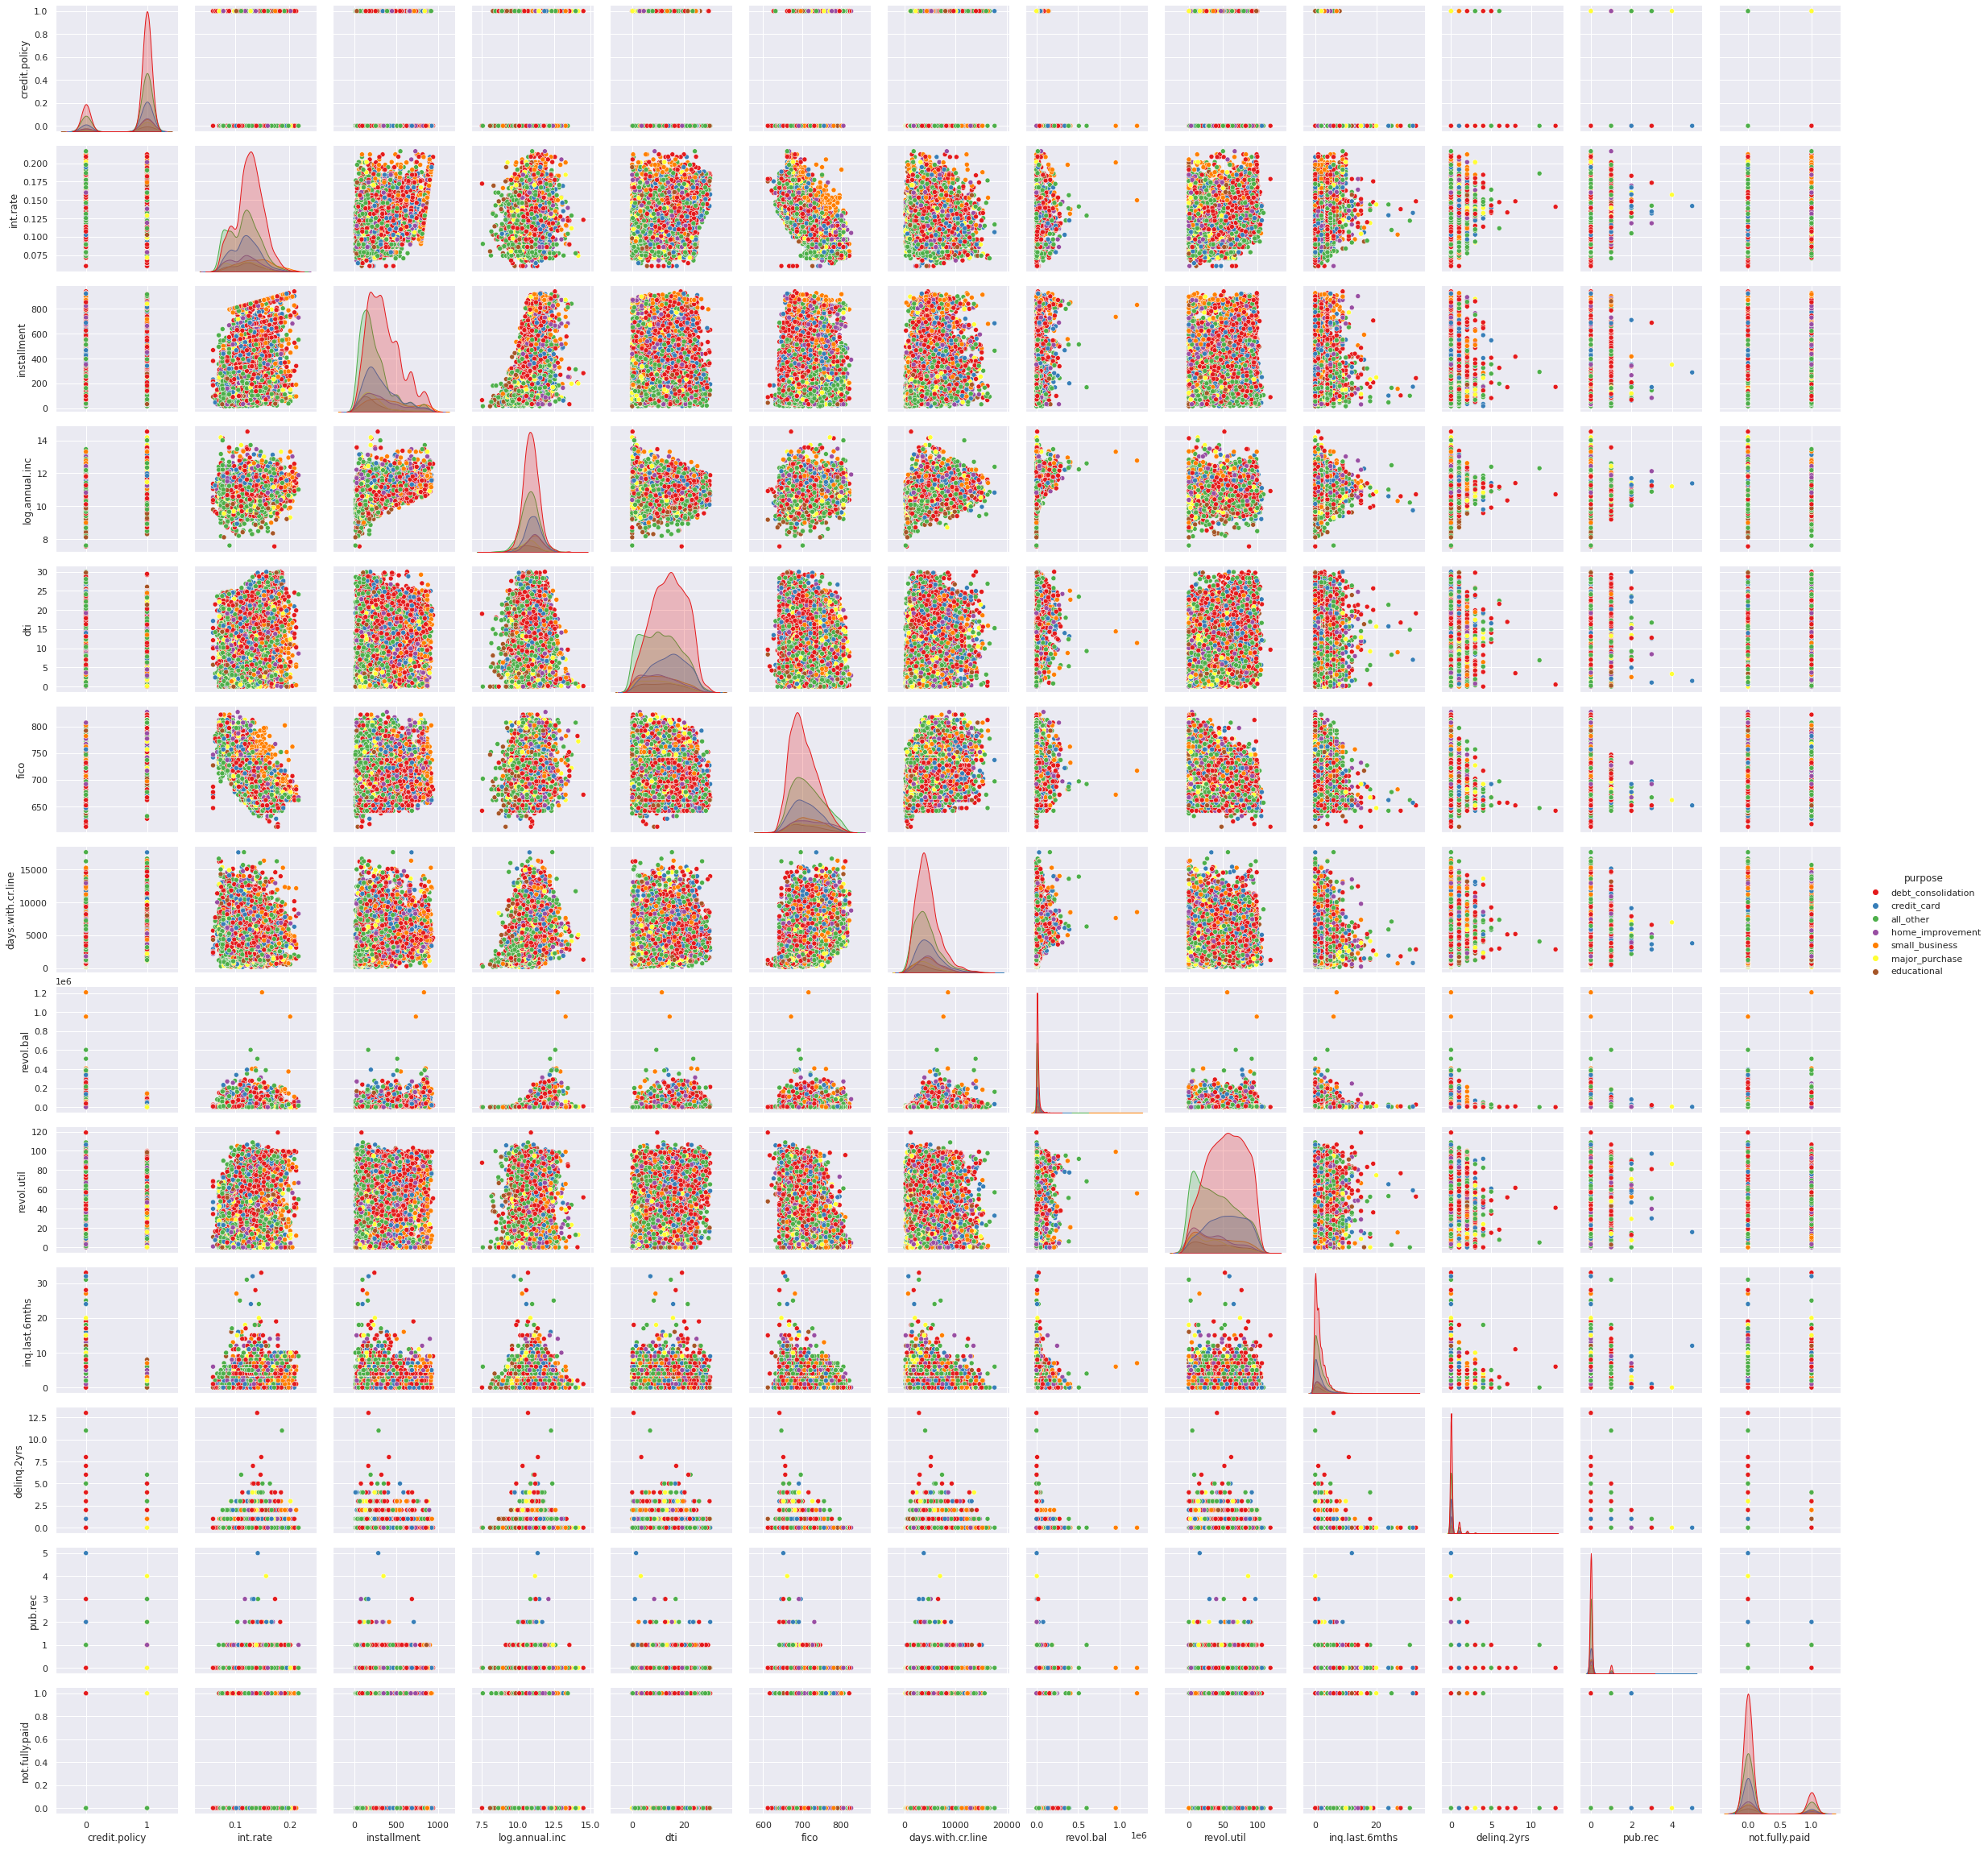

In [93]:
sns.pairplot(data,hue='purpose',palette='Set1')

#Train Test Split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
data.head()

credit.policy             purpose  ...  pub.rec  not.fully.paid
0              1  debt_consolidation  ...        0               0
1              1         credit_card  ...        0               0
2              1  debt_consolidation  ...        0               0
3              1  debt_consolidation  ...        0               0
4              1         credit_card  ...        0               0

[5 rows x 14 columns]

In [96]:
X = data.drop(columns=['credit.policy', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],axis=1,inplace=True)
y = data['purpose']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

TypeError: ignored

#Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#Prediction and Evaluation

In [99]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

                    precision    recall  f1-score   support

         all_other       0.32      0.34      0.33       674
       credit_card       0.16      0.15      0.15       402
debt_consolidation       0.53      0.50      0.52      1205
       educational       0.04      0.05      0.05        97
  home_improvement       0.09      0.09      0.09       188
    major_purchase       0.07      0.07      0.07       127
    small_business       0.18      0.19      0.18       181

         micro avg       0.34      0.34      0.34      2874
         macro avg       0.20      0.20      0.20      2874
      weighted avg       0.34      0.34      0.34      2874



In [100]:
print(confusion_matrix(y_test,predictions))

[[230  71 203  35  55  40  40]
 [ 93  60 156  17  25  21  30]
 [214 173 607  43  66  42  60]
 [ 41  15  20   5   7   5   4]
 [ 54  25  66   3  17   8  15]
 [ 43  16  29   8   8   9  14]
 [ 43  21  57   6   8  11  35]]


#Tree Visualizations

In [101]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data.columns[1:])
features

['int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util']

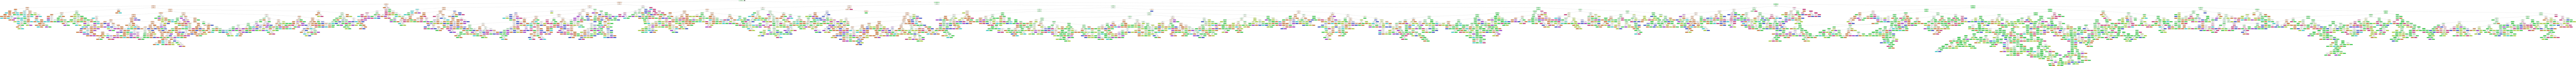

In [102]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())